# Amazon Product Review Sentiment Classification

In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_colwidth', 200)

In [2]:
df = pd.read_csv("amazon_product_reviews.csv")

### Basic inspection

In [3]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labr...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,"Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as ""Jumbo""."
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all","This is a confection that has been around a few centuries. It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with ..."
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient in Robitussin I believe I have found it. I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda. The fl...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,"Great taffy at a great price. There was a wide assortment of yummy taffy. Delivery was very quick. If your a taffy lover, this is a deal."


In [4]:
df.shape

(568454, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [6]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

## Check missing values

In [7]:
df.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

## Check duplicates

In [8]:
df.duplicated().sum()

np.int64(0)

## Rating distribution

In [9]:
df['Score'].value_counts().sort_index()

Score
1     52268
2     29769
3     42640
4     80655
5    363122
Name: count, dtype: int64

## Create binary sentiment labels

In [10]:
df = df[df['Score'] != 3]

In [11]:
df['sentiment'] = df['Score'].apply(
    lambda x: 'positive' if x >= 4 else 'negative')

In [12]:
df['sentiment'].value_counts()

sentiment
positive    443777
negative     82037
Name: count, dtype: int64

## Keeping useful columns

In [13]:
df = df[['Score', 'Summary', 'Text', 'sentiment']]

# Quick text sanity check

## ALL

In [14]:
df['Text'].head()

0    I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labr...
1             Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".
2    This is a confection that has been around a few centuries.  It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with ...
3    If you are looking for the secret ingredient in Robitussin I believe I have found it.  I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda.  The fl...
4                                                               Great taffy at a great price.  There was a wide assortment of yummy taffy.  Delivery was very quick.  If your a taff

## POSITIVE

In [15]:
df[df['sentiment'] == 'positive']['Text'].sample(3, random_state=42)

45288     I have started every morning for the last 7 months with a cup of Ganocafe Classic coffee. In my opinion it must be providing some benefits, I haven't had even one cold or any flu in that time. At ...
335756    Thank goodness this pasta makes life for a gluten-free lifestyle so much more enjoyable.  It cooks with enough firm texture, unlike other gluten-free items that become too soggy or a mush.  The pa...
318554    I am the type of person who gets tired and starts yawning when I am out at a bar... that is untill I discovered Rock Star.  This one is my favorite flavor, but they all get the job done.  I am a m...
Name: Text, dtype: object

## NEGATIVE

In [16]:
df[df['sentiment'] == 'negative']['Text'].sample(3, random_state=42)

525327    I have an absolute passion for deep, dark hot chocolate. I want chocolate which tastes like *chocolate*, rich and flavorful, with a hint of a bite. You can savor chocolate like that.<br />What I h...
75760     This drink is so "super energy" it's almost frightening.  Several members of my family tasted it and the consensus was that it might, indeed, give you a boost but the taste...some even compared it...
468100                                                                                    I'm sticking with what used to be carnation, now nestles malt. this stuff tastes like powdered milk with a hint of soy.
Name: Text, dtype: object

## Combine Summary + Text

In [17]:
df['review'] = df['Summary'].fillna('') + ' ' + df['Text'].fillna('')

In [18]:
df[['review', 'sentiment']].head()

,review,sentiment
0,Good Quality Dog Food I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it ...,positive
1,Not as Advertised Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product...,negative
2,"""Delight"" says it all This is a confection that has been around a few centuries. It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then ...",positive
3,Cough Medicine If you are looking for the secret ingredient in Robitussin I believe I have found it. I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherr...,negative
4,"Great taffy Great taffy at a great price. There was a wide assortment of yummy taffy. Delivery was very quick. If your a taffy lover, this is a deal.",positive


# EDA

## Review length analysis

In [19]:
df['review_length'] = df['review'].apply(len)

In [20]:
df['review_length'].describe()

count    525814.000000
mean        453.634848
std         443.624078
min          23.000000
25%         198.000000
50%         320.000000
75%         544.000000
max       16991.000000
Name: review_length, dtype: float64

In [21]:
df.groupby('sentiment')['review_length'].mean()

sentiment
negative    508.267940
positive    443.535327
Name: review_length, dtype: float64

## Review length distribution

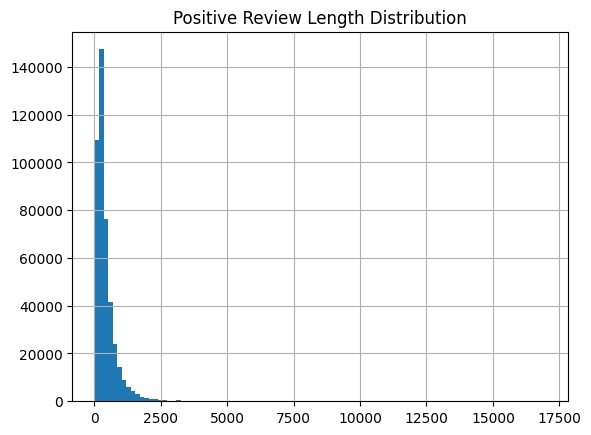

In [22]:
import matplotlib.pyplot as plt

plt.figure()
df[df['sentiment'] == 'positive']['review_length'].hist(bins=100)
plt.title('Positive Review Length Distribution')
plt.show()

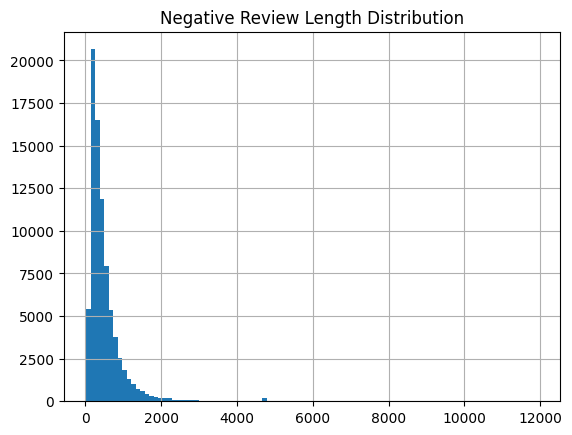

In [23]:
plt.figure()
df[df['sentiment'] == 'negative']['review_length'].hist(bins=100)
plt.title('Negative Review Length Distribution')
plt.show()

## Word count analysis

In [26]:
df['word_count'] = df['review'].apply(lambda x: len(x.split()))

In [27]:
df.groupby('sentiment')['word_count'].mean()

sentiment
negative    92.665724
positive    81.305122
Name: word_count, dtype: float64

## Boxplot comparison

<Figure size 640x480 with 0 Axes>

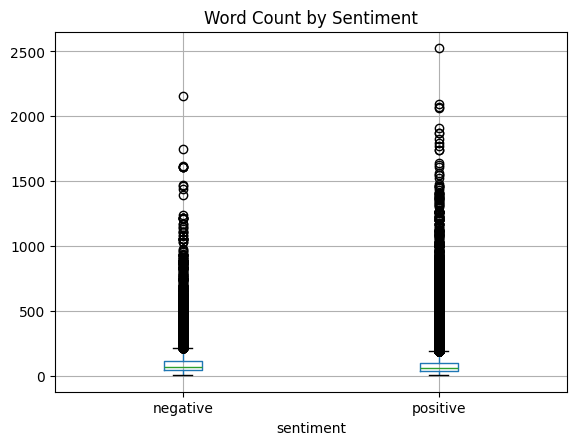

In [29]:
plt.figure()
df.boxplot(column='word_count', by='sentiment')
plt.title('Word Count by Sentiment')
plt.suptitle('')
plt.show()

## Most common words (raw, before cleaning)

In [30]:
from collections import Counter

all_words = ' '.join(df['review']).lower().split()
Counter(all_words).most_common(20)

[('the', 1699580),
 ('i', 1316757),
 ('and', 1200096),
 ('a', 1120082),
 ('to', 932508),
 ('of', 739719),
 ('it', 714791),
 ('is', 675330),
 ('this', 602346),
 ('for', 529904),
 ('in', 499307),
 ('my', 446010),
 ('that', 373992),
 ('but', 326661),
 ('with', 325208),
 ('have', 317941),
 ('not', 301820),
 ('are', 295385),
 ('you', 290958),
 ('was', 280772)]

## Common words by sentiment

In [31]:
pos_words = ' '.join(df[df['sentiment']=='positive']['review']).lower().split()
neg_words = ' '.join(df[df['sentiment']=='negative']['review']).lower().split()

Counter(pos_words).most_common(20)

[('the', 1372619),
 ('i', 1068236),
 ('and', 1017901),
 ('a', 953006),
 ('to', 768949),
 ('of', 603078),
 ('it', 587421),
 ('is', 573747),
 ('this', 492243),
 ('for', 454003),
 ('in', 415102),
 ('my', 382777),
 ('that', 300996),
 ('with', 275814),
 ('have', 267533),
 ('but', 261485),
 ('are', 255269),
 ('you', 248481),
 ('not', 212987),
 ('they', 212414)]

In [32]:
Counter(neg_words).most_common(20)

[('the', 326961),
 ('i', 248521),
 ('and', 182195),
 ('a', 167076),
 ('to', 163559),
 ('of', 136641),
 ('it', 127370),
 ('this', 110103),
 ('is', 101583),
 ('not', 88833),
 ('in', 84205),
 ('was', 76927),
 ('for', 75901),
 ('that', 72996),
 ('but', 65176),
 ('my', 63233),
 ('have', 50408),
 ('with', 49394),
 ('they', 47297),
 ('like', 45440)]

## Check imbalance ratio

In [33]:
df['sentiment'].value_counts()

sentiment
positive    443777
negative     82037
Name: count, dtype: int64

In [34]:
df_eda = df.copy()

# Text Preprocessing

In [36]:
import re
import string
import nltk

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [38]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

## preprocessing

In [40]:
def preprocess_text(text):
    # 1. Lowercase
    text = text.lower()
    
    # 2. Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    
    # 3. Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    
    # 4. Remove punctuation & numbers
    text = re.sub(r'[^a-z\s]', '', text)
    
    # 5. Tokenization
    tokens = text.split()
    
    # 6. Stopword removal
    tokens = [word for word in tokens if word not in stop_words]
    
    # 7. Lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # 8. Rejoin tokens
    return ' '.join(tokens)

## Apply preprocessing

In [41]:
df['clean_review'] = df['review'].apply(preprocess_text)

## Before vs After check

In [45]:
df[['review', 'clean_review']].sample(5, random_state=42)

,review,clean_review
443593,"Outstanding Food!!! This is a very high quality dog food with meat and fruits, and 0 grains. My dog loves the food after I switched him from a pretty decent dog food (kirkland super premium adult ...",outstanding food high quality dog food meat fruit grain dog love food switched pretty decent dog food kirkland super premium adult chicken formula noticed dog licking paw scratching every food swi...
136949,Thank you Betty Crocker I love this cake mix and the other 3 mixes as well. They are incredible & amazon offers the best price around. I am so thankful for Betty Crocker for coming out with thes...,thank betty crocker love cake mix mix well incredible amazon offer best price around thankful betty crocker coming mix since year old celiac disease cant eat gluten make life much easier since fri...
520459,Double Black Diamond A nice strong brew. I am new to Keurig and have lived on French press for years. This coffee is strong enough to compete. It is a little on the bitter side like some of Starb...,double black diamond nice strong brew new keurig lived french press year coffee strong enough compete little bitter side like starbucks coffee consider plus would rate star french press
219515,Fantastic! I just found PB2 and PB2 with chocolate and I am thrilled. I love sugary goodies but I'm not a fan of calories and I don't like chocolate. I thought I'd try PB2 with chocolate anyway ...,fantastic found pb pb chocolate thrilled love sugary goody im fan calorie dont like chocolate thought id try pb chocolate anyway im glad eating serving two pb chocolate satisfies sweet craving wit...
471273,Revolution tea is fantastic (for bagged tea) Delightful mint tea as one would expect. Note that each tea bag is NOT individually wrapped; there is one bag inside the box which holds all of the tea...,revolution tea fantastic bagged tea delightful mint tea one would expect note tea bag individually wrapped one bag inside box hold tea bag ziploc pouch purchased wedding favor herbalthemed wedding...


## empty reviews after cleaning

In [46]:
df = df[df['clean_review'].str.len() > 0]

## Token count after cleaning

In [47]:
df['clean_word_count'] = df['clean_review'].apply(lambda x: len(x.split()))

In [48]:
df.groupby('sentiment')['clean_word_count'].mean()

sentiment
negative    46.286103
positive    41.345796
Name: clean_word_count, dtype: float64

In [49]:
df_preprocessed = df.copy()

# Feature Engineering

## Train–test split

In [51]:
from sklearn.model_selection import train_test_split

X = df['clean_review']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

## Bag of Words

In [52]:
from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer(
    max_features=10000,
    min_df=5,
    max_df=0.9
)

X_train_bow = bow_vectorizer.fit_transform(X_train)
X_test_bow  = bow_vectorizer.transform(X_test)

In [53]:
X_train_bow.shape

(420650, 10000)

## TF-IDF

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(
    max_features=15000,
    min_df=5,
    max_df=0.9,
    ngram_range=(1, 1)
)

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf  = tfidf_vectorizer.transform(X_test)

## upgrade: TF-IDF

In [58]:
tfidf_bigram_vectorizer = TfidfVectorizer(
    max_features=20000,
    min_df=5,
    max_df=0.9,
    ngram_range=(1, 2)
)

X_train_tfidf_bg = tfidf_bigram_vectorizer.fit_transform(X_train)
X_test_tfidf_bg  = tfidf_bigram_vectorizer.transform(X_test)

# Add text-based numeric features

In [59]:
from scipy.sparse import hstack

train_length = X_train.str.len().values.reshape(-1, 1)
test_length  = X_test.str.len().values.reshape(-1, 1)

X_train_tfidf_bg_plus = hstack([X_train_tfidf_bg, train_length])
X_test_tfidf_bg_plus  = hstack([X_test_tfidf_bg, test_length])

# Feature sets summary

In [61]:
feature_sets = {
    "BoW": X_train_bow,
    "TF-IDF": X_train_tfidf,
    "TF-IDF + Bigrams": X_train_tfidf_bg,
    "TF-IDF + Bigrams + Length": X_train_tfidf_bg_plus
}

for name, features in feature_sets.items():
    print(name, features.shape)

BoW (420650, 10000)
TF-IDF (420650, 15000)
TF-IDF + Bigrams (420650, 20000)
TF-IDF + Bigrams + Length (420650, 20001)


# Model Training

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score, classification_report

## Helper function

In [63]:
def train_evaluate(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    f1  = f1_score(y_test, y_pred, pos_label='positive')
    
    print(f"{model_name}")
    print(f"Accuracy : {acc:.4f}")
    print(f"F1-score : {f1:.4f}")
    print("-" * 40)

## Naive Bayes with BOW

In [64]:
nb_model = MultinomialNB()

train_evaluate(
    nb_model,
    X_train_bow,
    X_test_bow,
    y_train,
    y_test,
    "Naive Bayes + BoW"
)

Naive Bayes + BoW
Accuracy : 0.9192
F1-score : 0.9518
----------------------------------------


## Logistic Regression with TF-IDF

In [65]:
lr_model = LogisticRegression(
    max_iter=1000,
    n_jobs=-1
)

train_evaluate(
    lr_model,
    X_train_tfidf,
    X_test_tfidf,
    y_train,
    y_test,
    "Logistic Regression + TF-IDF"
)

Logistic Regression + TF-IDF
Accuracy : 0.9454
F1-score : 0.9681
----------------------------------------


## Logistic Regression with TF-IDF + Bigrams

In [66]:
lr_model_bg = LogisticRegression(
    max_iter=1000,
    n_jobs=-1
)

train_evaluate(
    lr_model_bg,
    X_train_tfidf_bg,
    X_test_tfidf_bg,
    y_train,
    y_test,
    "Logistic Regression + TF-IDF (1–2 grams)"
)

Logistic Regression + TF-IDF (1–2 grams)
Accuracy : 0.9513
F1-score : 0.9715
----------------------------------------


## Logistic Regression — TF-IDF + Bigrams + Length

In [67]:
lr_model_bg_len = LogisticRegression(
    max_iter=1000,
    n_jobs=-1
)

train_evaluate(
    lr_model_bg_len,
    X_train_tfidf_bg_plus,
    X_test_tfidf_bg_plus,
    y_train,
    y_test,
    "Logistic Regression + TF-IDF + Bigrams + Length"
)

Logistic Regression + TF-IDF + Bigrams + Length
Accuracy : 0.9476
F1-score : 0.9693
----------------------------------------


# Model Evaluation and Error Analysis

In [70]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np

## Confusion Matrix

In [72]:
cm = confusion_matrix(y_test, y_pred, labels=['positive', 'negative'])

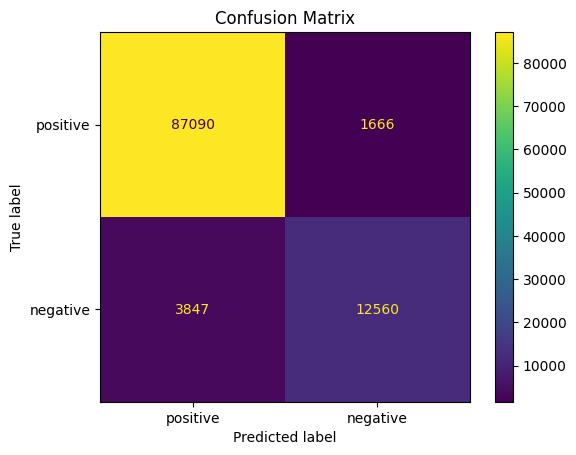

In [73]:
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=['positive', 'negative']
)

disp.plot()
plt.title("Confusion Matrix")
plt.show()

## Classification Report

In [74]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.88      0.77      0.82     16407
    positive       0.96      0.98      0.97     88756

    accuracy                           0.95    105163
   macro avg       0.92      0.87      0.89    105163
weighted avg       0.95      0.95      0.95    105163



## TEST IT

In [79]:
def predict_sentiment(review_text):
    clean_text = preprocess_text(review_text)
    
    text_vector = tfidf_bigram_vectorizer.transform([clean_text])

    length_feature = np.array([[len(clean_text)]])
    
    from scipy.sparse import hstack
    final_features = hstack([text_vector, length_feature])
    
    prediction = best_model.predict(final_features)[0]
    probability = best_model.predict_proba(final_features).max()
    
    return prediction, probability

## RESULT

In [80]:
review = "This product is amazing, quality is excellent and worth the price"

predict_sentiment(review)

('positive', np.float64(0.9986778746790858))

In [81]:
review = "Very disappointed. The item broke in two days and waste of money."

predict_sentiment(review)

('negative', np.float64(0.9999389979620719))